# Linear Models

In [1]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [2]:
import numpy as np
import pandas as pd
from addutils import css_notebook
from sklearn.datasets.samples_generator import make_regression
from sklearn import linear_model, neighbors
from sklearn import metrics
css_notebook()

In [3]:
import bokeh.plotting as bk
from bokeh import palettes
from bokeh.layouts import gridplot
bk.output_notebook()

Loading BokehJS ...

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

## 1 Introduction

In this notebook we introduce linear models for regression and classification. This introduction serves also to introduce the main terminology of ML as well one important aspect of ML practice: the *curse of dimensionality*.

## 2 Linear Model for Regression

`LinearRegression` fits a linear model with coefficients $w = (w_1, \ldots, w_p)$ to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation.

Mathematically it solves a problem of the form: 
$$ \underset{w}{min} \|Xw -y\|_2^2$$

### 2.1 Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It has the following mathematical definition:

$y = \beta_0 + \beta_1x$

Where:
- $y$ is the response or **target**
- $x$ is the **feature**
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients** or **parameters**. To build the model, it is necessary to **learn** the values of these coefficients. And once the model has learned these coefficients, it can be used for prediction. We are learning a function, sometimes called **hypothesis** that is $h(x) = \beta_0 + \beta_1x$

In supervised learning we are going to learn model from examples. What are examples? They are given couples feature, response. For example suppose we want to learn to predict the price of a house based on its size in feet$^2$. You are presented a **dataset** that is a table with two columns one that represent the size and the other that represent the price.

<img src="images/trainset_example.png" alt="" height="500" width="500">

An **example** is a line in the table. The number of example $n$ is the size of the dataset. A couple $(x, y)$ is one training example, $(x_i, y_i)$ refers to the $i^{th}$ training example.

<img src="images/train_cycle.png" alt="" height="400" width="400">

### 2.2 Interpreting Model Coefficients

How do we interpret the coefficient $\beta_1$? A *unit* **increase** in the variable $x$ is **associated with** $\beta_1$ *unit* **increase** in variable $y$. Note that if an increase in $x$ is associated with a **decrease** in $y$, $\beta_1$ would be **negative**.

In [5]:
X, y = make_regression(n_samples=100000, n_features=1, n_informative=1,
                       random_state=0, noise=35)

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

fig = bk.figure(plot_width=630, plot_height=300, title=None)
fig.circle(X[::1000, 0], y[::1000],  color='black')
fig.line(X[::1000, 0], regr.predict(X[::1000]), color='red', line_width=3)
fig.grid.grid_line_color = None
fig.axis.minor_tick_out = 0
bk.show(fig)

### 2.3 Estimating Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which finds the line that minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="images/estimating_coefficients.png">

Where:
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical representation:

<img src="images/slope_intercept.png">

Different choices of $\beta_0$ and $\beta_1$ give us different hypothesis. How do I choose $\beta_0$ and $\beta_1$ in order to get the best regression line? That is we want to find the best couple of $\beta_0$ and $\beta_1$ that minimizes the difference between the output of our hypothesis and the target. Using the notation above:
$$min_{\beta_0, \beta_1} \quad J(\beta_0, \beta_1) = \frac{1}{2n}\sum_i^n (h(x_i)-y_i)^2$$
the second part of the expression is the **cost function** (*mean squared error* in this case) and it depends on $\beta_0$ and $\beta_1$, so changing their values changes the cost. Why we use the squared error? It is one of the most used functions, but there are many other. We will see why it is useful. 

To recap, we have:
- an *hypothesis*: the equation of the line
- *parameters* to learn: $\beta_0$ and $\beta_1$
- *cost function*: mean squared error
- *goal*: minimize error

In order to ease the discussion we will make an example with a single parameter hypothesis:  $h(x) = \beta_1x$; we are going to find a value for $\beta_1$ that minimize $J(\beta_1) = \frac{1}{2n}\sum_i^n (h(x_i)-y_i)^2$. How does varying the parameter affect the cost function? How varies the error?

<img src="images/beta_cost.png" alt="" height="600" width="600">

What happens if we keep both the coefficients $\beta_0$ and $\beta_1$? We have a quadratic bowl, such as the one in the picture below. 

<img src="images/quadratic_bowl.png" alt="" height="600" width="600">

### 2.4 Learning algorithm

How do we learn the parameters? We have a quadratic surface, how about starting with some random value for the parameters $\beta_0$, $\beta_1$ and then keep changing them until the cost function reaches its minimum? There could be different **local minima** as well as a **global minima**. Changing the initialization slightly changes the outcome of the optimization. 

<img src="images/gradient_descent.png" alt="" height="600" width="600">

What is the update step? We are moving in the direction of the slove, using the derivative of the error function. How further we move? By a fixed proportion of this derivative, $\alpha$ called the *learning rate* 

$$\beta_i = \beta_i - \alpha \frac{\delta}{\delta \beta_i} J(\beta_0, \beta_1) \quad i=0,1$$

How do we apply gradient descent to minimize the mean squared error cost function? We plug our $J$ into the parameter update function and we take the derivative. 

$$\frac{\delta}{\delta \beta_0} J(\beta_0, \beta_1) =  \frac{\delta}{\delta \beta_0}\frac{1}{2n}\sum_i^n [(\beta_0 + \beta_1 x_i)-y_i]^2 = \frac{1}{n} \sum_i^n (h(x_i)-y_i)$$
$$\frac{\delta}{\delta \beta_1} J(\beta_0, \beta_1) =  \frac{\delta}{\delta \beta_1}\frac{1}{2n}\sum_i^n [(\beta_0 + \beta_1 x_i)-y_i]^2 = \frac{1}{n} \sum_i^n (h(x_i)-y_i) x_i$$

Actually the graph for the cost function for the linear regression is a convex function that always return the global minima. 

### 2.5 Multiple features

At the moment we are trying to predict an outcome based on a single input variable (or feature). What if we have multiple variables as input? Does the accuracy of the model improve?

<img src="images/trainset_multiple_example.png" alt="" height="500" width="500">

In this case I can call the first four features as $x_1, x_2, x_3, x_4$ and the target (the price) is $y$. Here we introduce another concept in ML. The concept of dimensionality. The dimensionality of a dataset is the number of features that it has. We will denote the number of features of a dataset with the letter $p$. Here $p = 4$ (whereas in the previous example $p=1$). To simplify, $n$ is the number of rows in the table, while $p$ is the number of columns of the table.

If we look at the previous notation, we can upgrade it so that now $x_i^{(j)}$ denotes the $i^{th}$ example and the $j^{th}$ feature. With multiple features the table is a matrix and each example $x_i$ is a $p$ dimensional vector. Talking again about notation, if we have multiple features our hypothesis become: 

$$ h(x) = \beta_0 + \beta_1x^{(1)} + \beta_2x^{(2)} + \ldots + \beta_px^{(p)}$$

Since it is no longer possible to use such notation to express the computation of the hypothesis we switch to the vectorized notation. We use a fake $x^{(0)}$ for the intercept  that we set it to $1$ for each example so that our notation becomes:

$$ h(x) = \beta_0x^{(0)} + \beta_1x^{(1)} + \beta_2x^{(2)} + \ldots + \beta_px^{(p)}$$ 

where $x_i^{(0)} = 1 \quad \forall i$. This way we can simplify the expression of the hypothesis as a dot product betwee the input and the paramteres:

$$ h(X) = \beta^TX$$ 

How does the update rule for the gradient descent algorithm? We use vector notation for the parameter $\beta$ that now denotes a $p$ dimensional vector, lile $x$. Since we added our fake $x_i^{(0)}$ we are going to use a single update rule for each parameter:

$$\beta_j = \beta_j - \alpha \frac{\delta}{\delta \beta_j} J(\beta) = \beta_j - \alpha \frac{1}{n} \sum_i^n (h(x_i)-y_i) x_j \quad \forall i$$

**Problems** with gradient descent:
- you need to find the correct learning rate
- you have to scale data to use it effectively
- you need many iterations

### 2.6 Normal equation

Instead of gradient descent we can solve for the vector of parameters analytically. Let's see how we can do it. We have switched to vectorized notation. Now the input is no longer a vector of length $n$ but a $n \times p$ matrix. We can rewrite our hypothesis in matrix notation as:

$$Y = XB$$

where $Y$ is a $n$-dimensional vector and $B$ is a $p$-dimensional vector. Can we solve directly for $B$? Yes, we can obtain it from the residual sum of squares that we see at the beginning. 

$$RSS(\beta) = \sum_{i=1}^n (y_i - h(x_i))^2 = \sum_{i=1}^n (y_i - \sum_{j=1}^p(x_{ij}\beta_j))^2 $$

How to minimize this? If we switch to the matrix notation above we obtain the following equation:

$$RSS(\beta) = (y - X\beta)^T(y - X\beta)$$

This is a quadratic function in the $p+1$ parameters. Differentiating with respect to $\beta$ we obtain:

$$\frac{\delta RSS(\beta)}{\delta \beta} = -2X^T(y - X\beta)$$

Assuming (for the moment) that X has full column rank, and hence $X^T X$ is positive definite, if we set this derivative to zero we get:

$$X^T(y - X\beta) = 0$$

we can obtain the solution: 

$$\hat B = (X^T X)^{−1} X^T Y$$

It might happen that the columns of X are not linearly independent, so that X is not of full rank. This would occur, for example, if two of the inputs were perfectly correlated, (e.g., x 2 = 3x 1 ). Then $X^T X$ is singular and the least squares coefficients $\beta$ are not uniquely defined. This implies that the matrix is not invertible. It is possible to remove redundant features or use pseudo-inverse.

**Problems** with Normal equation:
- computing $(X^T X)^{−1}$ is done in $O(n^3)$
- slow if $n$ is large

### 2.7 Nearest Neighbors

It is tempting to ask if there is an ideal $h(x)$. In particular whatis a good value of $h(x)$ at anly selected value of $x$? If the dataset has some noise, there can be many $y$ values for each $x$. An approximation for our target function can thus be:

$$ h(x) = E(y \mid x=v) $$

So the correct value might be the expected value of the target at that particular point. The case of linear regression is a particular case where we might have a single value at each data point. This is an ideal form of *regression function*. $x$ can also be a vector. It is *ideal* because is the function that minimizes $E[(Y-g(x))^2 \mid x=v]$ over all function $g$ at all points $x$. We are still making mistakes, called *irreducible error* (remember the noise in the measurements?). 

Typically we don't have many (sometimes we don't even have a value for each point), so we cannot compute $E(y \mid x=v)$! What can we do? We can relax the definition and let

$$ \hat h(x) = Ave(y \mid x \in \mathcal{N}(x)) $$

where $\mathcal{N}(x)$ is some neighborhood of $x$.

This algorithm is called **Nearest Neighbour** (or local averaging). 

In [7]:
n_neighbors = 10
sample = 1000

knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
knn.fit(X, y)

fig = bk.figure(plot_width=630, plot_height=300, title=None)
fig.circle(X[::sample, 0], y[::sample],  color='black')
a = np.hstack([np.atleast_2d(X[::sample, 0]).T, 
               np.atleast_2d(knn.predict(X[::sample])).T])
a = a[a[:,0].argsort()]
fig.line(a[:,0], a[:,1], color='red', line_width=3)
fig.grid.grid_line_color = None
fig.axis.minor_tick_out = 0
bk.show(fig)

Albeit it is a pretty cool idea, it does not work in higher dimension. This introduces a major topic in ML.

### 2.8 The Curse of Dimensionality

Nearest Neighbor averaging can be pretty good for small $p$ (tipycally $p \leq 4$) and larger $n$. But what happens when $p$ is large? This method can be pretty lousy. The reason is the curse of dimensionality. Nearest Neighbors tend to be far away in high dimensions. 

We need to get a reasonable fraction of the N values of $y_i$ to average to bring the variance down. A $10\%$ neighborhood in high dimensions need no longer be local, so we lose the spirit of estimating $E(y \mid x=v)$ by local averaging.

**TODO:** aggiungere immagine e domanda di esempio

## 3 Linear Models for classification

In classification the output that we want to predict is a discrete value that has typically few values that we call **classes**. Recall the example that we did before: 
- email: spam/not spam
- transaction: fraudolent/not fraudolent
- tumor: malignant/benign

we can assign numerical values to those classes and our target variable becomes $y \in (0,1)$ where $0$ is the *negative class* (not spam) and $1$ is the *positive class* (spam). 

Let's see if we can apply simple linear regression to one of this problems. For example we want to learn if a tumor is malignant or not based on its size. Suppose that we see the following example, that is our dataset is composed of various tumor measurements and to each one is associated the value $1$ malignant and $0$ benign. Suppose that I find an hypothesis such that is represented by the line in the picture. How can I decide to which class each example belongs?

<img src="images/logistic_regression.png" alt="" height="500" width="500">

I can use a threshold at $0.5$ for example such that: 
- if $h(x) \geq 0.5$ predict $1$ 
- if $h(x) < 0.5$ predict $0$

what happens if we change the dataset a little bit? Let's say we add one more example to the right.

<img src="images/logistic_regression2.png" alt="" height="600" width="600">

What happened? Linear regression changed because of the single value, and using our threshold of $0.5$ now gives wrong results. How can we overcome this kind of situations? Is it possible to use a different algorithm that estimates the class correctly? Linear regression output can be $>1$ and $<0$ while in a two-class classification problem the class can be $0$ or $1$. 

### 3.1 Logistic Regression

The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $x$, while at the same time ensuring that they sum to one and remain in $[0, 1]$.

We apply the logistic function to hour hypothesis. What is the logistic function? 

<img src="images/logistic_function.png" alt="" height="500" width="500">

$$g(z) = \frac{1}{1+e^{-z}} $$

We can apply this function to our previous linear regression hypothesis:

$$ h(x) = g(\beta^Tx)$$

Now the $z$ in the previous function has now the value of $\beta^Tx$ and the output of my hypothesis is no longer the value of $\hat y$ but the probability of being in that class that is $P(Y=c \mid X=x)$, given $x$ parametrized by $\beta$.

### 3.2 Decision Boundary

Why the logistic regression is a linear model if its function is clearly non linear? Let's discuss how the class is computed. 

Again we are using a threshold, suppose to predict $y=1$  if $h(x) \geq 0.5$ and  $y=1$  if $h(x) < 0.5$. In this case $g(z) \geq 0.5$. But when it is such the case? $g(z)$ is $\geq 0.5$ when $z \geq 0$, so basically when $\beta^Tx \geq 0$.

What happens in the other case? $y=0$  if $h(x) < 0.5$. In this case $g(z) < 0.5$ when $z < 0$, so basically when $\beta^Tx < 0$

<img src="images/decision_boundary.png" alt="" height="500" width="500">

Suppose that we are looking at the region boundary in the picture above. In this case the line that divides the two planes has equation $-3+x_1+x_2 = 0$. In this case we are classifying the examples with class 1 when $x_1 + x_2 \geq 3$ and we are classifying examples with class 0 when $x_1 + x_2 < 3$

### 3.3 Cost function

Using mean squared error as the cost for the logistic gives us a non-convex function in the parameter $\beta$. What do we mean for non convex? See the picture below! This happens because the $h(x)$ in the cost function has nonlinearities (the logistic function). In this way it is really hard to find the global minimum of the error function and thus the optimal solution. 

<img src="images/non_convex.png" alt="" height="600" width="600">

We need another cost function.

$$J(h(x),y) = \Bigg\{\begin{array}{lr}
    -log(h(x)) & if y=1\\
    -log(1-h(x)) & if y=0
  \end{array}$$
  
Let's see if it works. If $y=1$ and $h(x)=1$ the cost is zero. So if the model is predicting the correct label the error is zero as expected. If however $y=1$ and $h(x)=0$ the cost is $\inf$ because we have $-log(0)$. This capture the notion that if we are making a mistake we are going to penalize the model by a large quantity. 

<img src="images/logistic_cost.png" alt="" height="700" width="700">

The same applies for the case where $y=0$.

**TODO:** figura con bokeh

<IPython.core.display.Javascript object>


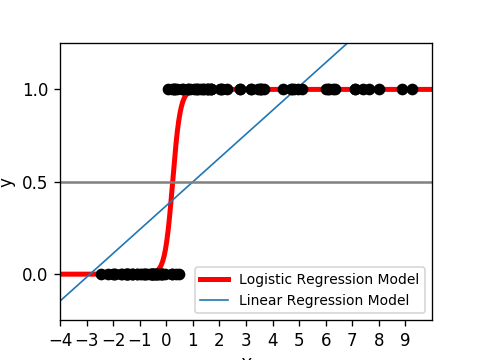

In [8]:
# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()

### 3.4 Multiclass Classification

So far we have assumed that the logistic regression can calssfify problems with an outcome consisting in two classes. It is possible to extend to a multiclass setting, that is, a problem where the discrete output variable can assume more than two values. 

One simple extension to the basic binary classification is to use a one-vs-all approach, that is turn the problem in three separate problems, each of which is binary.

<img src="images/one_vs_all.png" alt="" height="700" width="700">

Train a logistic regression classifier for each class:

$$h_i(x) = P(y=i \mid x, \beta) \quad (i=1,2,3)$$

on new input $x$ output the class that maximizes the probability 

$$\underset{i}{max} \, h_i(x)$$

---

Visit [www.add-for.com](<http://www.add-for.com/IT>) for more tutorials and updates.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.